<a href="https://colab.research.google.com/github/quokka-works/US-Wind-Farm-Allocation-Between-Years/blob/main/US_Wind_Farm_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GİRİŞ

Bu raporda, Amerika Birleşik Devletlerinde 1981 ile 2018 yılları arasında kurulumu yapılmış olan rüzgar türbinlerinin yıllara göre dağılımını, enerji üretim kapsitelerinde ne kadar seviyede artış olduğunu, hangi şirketlerin pazarda baskın olduğunu inceleyeceğiz. İhtiyaç olması durumunda, veriseti hakkında detaylı bilgiye [buradan](https://github.com/rfordatascience/tidytuesday/tree/master/data/2018/2018-11-06) erişebilirsiniz.

# KÜTÜPHANELER

Rapor kapsamında ilgili kütüphaneler yüklenir.
*   **pandas**: 

> "tidetuesday" platformunun bize sağlamış olduğu verisetini okuyabilmek için yüklenmiştir.

*   **numpy**:

> Veriseti manipülasyonu ve matematiksel fonksiyonların kullanımı için yüklenmiştir.

*   **plotly**: 

> Interaktif mekansal, zaman serisi görseller için yüklenmiştir.

*   **seaborn**: 

> Rüzgar türbinlerine ait korelasyon değerlemesi için yüklenmiştir.

*   **folium**

> Rüzgar türbini pazarındaki dominant şirketlerin logolarının haritaya eklenmesi için yüklenmiştir.

*   **ipywidgets**

> Rüzgar türbini kurulumlarının yıllara göre dağılımını widget olarak uyarlanması için yüklenmiştir.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium
from folium import plugins
import ipywidgets
from ipywidgets import interact
import plotly.graph_objects as go

# VERİSETİ KEŞFETME

Rapor kapsamında kullanılacak olan verilerin, açık kaynak olarak erişilebilmesi ve kolaylık sağlayabilmesi için, sunucu adresi üzerinden erişim sağlanmıştır. Bu sayede, kodu çalıştıracak kişinin ekstra herhangi bir yükleme yapmasına gerek olmayacaktır.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2018/2018-11-06/us_wind.csv")

In [3]:
df.shape

(58185, 24)

In [4]:
df.head()

case_id  faa_ors  faa_asn  usgs_pr_id t_state     t_county  t_fips  \
0  3073429  missing  missing        4960      CA  Kern County    6029   
1  3071522  missing  missing        4997      CA  Kern County    6029   
2  3073425  missing  missing        4957      CA  Kern County    6029   
3  3071569  missing  missing        5023      CA  Kern County    6029   
4  3005252  missing  missing        5768      CA  Kern County    6029   

     p_name  p_year  p_tnum  ...    t_hh    t_rd   t_rsa  t_ttlh  t_conf_atr  \
0  251 Wind    1987     194  ... -9999.0 -9999.0 -9999.0 -9999.0           2   
1  251 Wind    1987     194  ... -9999.0 -9999.0 -9999.0 -9999.0           2   
2  251 Wind    1987     194  ... -9999.0 -9999.0 -9999.0 -9999.0           2   
3  251 Wind    1987     194  ... -9999.0 -9999.0 -9999.0 -9999.0           2   
4  251 Wind    1987     194  ... -9999.0 -9999.0 -9999.0 -9999.0           2   

   t_conf_loc  t_img_date     t_img_srce       xlong       ylat  
0           3    1/1/2012           NAIP -118.360725  35.083778  
1           3    1/1/2012           NAIP -118.361168  35.081512  
2           3    1/1/2012           NAIP -118.360420  35.084709  
3           3   7/31/2016  Digital Globe -118.364029  35.079418  
4           3  11/23/2017  Digital Globe -118.354286  35.085594  

[5 rows x 24 columns]

**NİTELİKLER HAKKINDA**

*   **faa_ors:** Engel depolama sistemi (ORS) için FAA dijital engel dosyası (DOF).

>**DOF Nedir?**

Pasifik, Karayipler, Kanada ve Meksika'da sınırlı kapsama alanıyla Amerika Birleşik Devletleri'ndeki havacılık kullanıcılarının ilgisini çeken bilinen tüm engelleri açıklar. Engellere benzersiz sayısal tanımlayıcılar atanır.

>**DOF Formatı**

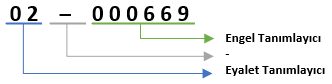

*   **faa_asn:** Havaalanı hava sahası analizi (OE-AAA). Havacılık çalışma numarası (ASN).

>**Havalimanı Hava Sahası Analizi için Engel Değerlendirmesi Nedir?**

Ulusal hava sahasını, hava seyrüsefer tesislerini veya havaalanı kapasitesini etkileyebilecek herhangi bir nesne için Federal Havacılık İdaresi (FAA) tarafından yürütülen havacılık çalışmalarını ifade eder.

>**Havacılık Çalışma Numarası (asn) Formatı:**

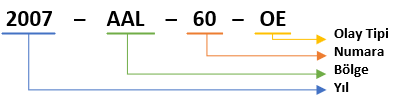


*   **t_state:** Rüzgar türbininin bulunduğu eyaleti temsil etmektedir.

*   **t_county:** Rüzgar türbininin bulunduğu ilçeyi temsil etmektedir.

*   **t_fips:**

>**FIPS Nedir?**

FIPS (Federal Bilgi İşlem Sistemi), rüzgar türbinlerinin bulunduğu konumu temsil eden 5 basamaklı Eyalet ve İlçe kimliğidir.

>**FIPS Formatı**

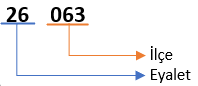


*   **p_year:** Rüzgar türbinlerinin devreye alma yıllarını temsil etmektedir.

*   **p_tnum:** Projede bulunan toplam rüzgar türbini sayısını temsil etmektedir.

*   **p_cap:** Projenin sahip olduğu toplam enerji üretim kapasitesini MW cinsinden temsil etmektedir.

*   **t_manu:** Rüzgar türbininin üretici firmasını temsil etmektedir.

*   **t_cap:** Rüzgar türbininin enerji üretim kapasitesini kW cinsinden temsil etmektedir.

*   **t_hh:** Rüzgar türbininin göbek yükseliğini metre cinsinden temsil etmektedir.

*   **t_rd:** Rüzgar türbinine ait rotor yarıçapını metre cinsinden temsil etmektedir.

*  **t_rsa:** Rüzgar türbini rotor sürpme alanını metrekare cinsinden temsil etmektedir.

*   **t_ttlh:** Rüzgar türbinine ait toplam yüksekliği metre cinsinden temsil etmektedir.

*   **xlong:** İlgili rüzgar türbinine ait, dünya üzerindeki boylam bilgisini vermektedir.

*   **ylat:** İlgili rüzgar türbinine ait, dünya üerindeki enlem bilgisini vermektedir.


# VERİ KAPSAMINDA CEVAP ARAYAN SORULAR
İlgili raporda, veriye ait toplamda  adet soru sorulmuş, buna göre veriye ait içgörüyü sağlayacak 10 farklı görsel sunulmuştur. Aşağıda ilgili soruları, görselleri ve soru hakkındaki gözlemlerimi bulabilirsiniz.

**1. Eyaletlere göre hangi üretici firma pazarda daha dominant?**

Bu soruyu değerlendirebilmek için öncelikle kurulumu yapılmış olan rüzgar türbinlerinin harita üzerinde dağılımlarını inceledim.

Devamında üretici firmaları ve eyaletlerin konumlarını kapsayan **beş (5)** ayrı veriseti tanımladım. Buna göre, ilgili üreticilerin çeşitli kaynaklardan almış olduğum .png formatındaki logolarını haritada konumlandırdım.

*   **manufacturers**: 

> Bu verisetinde eyaletlere göre üretici firmaların dominantlığını gözlemleyebilmek için, öncelikle eyalete, sonrasında üreticiye göre verisetini grupladım. Gruplanmış olan verisetini "case_id" (primary key gibi de düşünebilirsiniz) olarak belirtilmiş olan unique index değerini referans alarak sayma fonksiyonunu (.count()) kullandım, bu sayede her bir rüzgar türbini için firmaların eyaletlerde sahip olduğu rüzgar türbini adedini gözlemleyebildim.

*   **max_manu**: 

> Her bir eyalette üretici firmaya ait bulunan rüzgar türbini sayısını içeren verisetini tanımladım.

*   **max_manu_state**: 

> Her bir eyaletteki dominant üreticiyi belirleyebilmek için, "manufacturers" ile "max_manu" verisetlerini, eyalete ve indeks değerine göre birleştirdim. Burada dikkat edilmesi gereken nokta,  referenas alınan verisetinin manufacturer olması.

*   **state_pos**

>Haritada bulunan eyaletlerin konum bilgilerini alabilmek adına, ham verisetini eyaletlere göre grupladım, "xlong" ve "ylat" verilerinin ortalama değerlerini aldım. İlgili konum bilgileri eyaletlere bağlı ilçelerin konum bilgileridir, ayrıca bu konum bilgileri elipsoid **Geodetic Reference System (GRS80)** sistemini kullanan **North American 1983 (NAD83)** verilerine göre olduğundan, hassasiyeti yüksektir. Bu soruda amaçladığımız, üretici firmaların baskınlığını eyaletlere göre bulmak olduğundan ilçelere ait konum bilgilerinin ortalama değerlerinin alınması hataya sebep olmayacaktır, ihmal ettiğimiz bilgi küçük olması sebebiyle bu yöntem uygun görülmüştür. 


*   **max_manu_state_pos**

>Her bir eyalette dominant olan üretici firmaların bulunduğu verisetiyle, eyletlerin konum bilgilerinin olduğu verisetini birleştirdim.

In [5]:
states = df['t_state'].value_counts()

In [6]:
states = pd.DataFrame(states).reset_index()
states.head()

index  t_state
0    TX    13232
1    CA     9037
2    IA     4280
3    OK     3821
4    KS     2898

In [7]:
fig = px.bar(states, x='index', 
             y='t_state',
             labels={'t_state':'Rüzgar Türbini Adeti', "index":"Eyaletler"},
             title="A.B.D. Eyaletlerine Göre Kurulu Olan Toplam Rüzgar Türbini Adeti (2018)")
fig.show()

In [8]:
fig = px.density_mapbox(df, lat='ylat', 
                        lon='xlong', 
                        radius=10,
                        center=dict(lat=44.9672, lon=-103.771556), 
                        zoom=1.5,
                        mapbox_style="stamen-terrain",
                        range_color=(0,100),
                        title="A.B.D. Eyaletlerine Göre Kurulu Olan Toplam Rüzgar Türbini Dağılımı (2018)")
fig.layout.coloraxis.colorbar.title = 'Rüzgar Türbini Adeti'
fig.show()

In [9]:
manufacturers = df[df['t_manu']!='missing']

In [10]:
manufacturers = manufacturers.groupby(['t_state' , 't_manu'])['case_id'].count().reset_index()

In [11]:
max_manu = manufacturers.groupby(['t_state']).agg({'case_id':np.max}).reset_index()
print(manufacturers.head())
print (max_manu.head())

  t_state           t_manu  case_id
0      AK              AOC        7
1      AK  Atlantic Orient        4
2      AK              EWT        6
3      AK        Entegrity       16
4      AK          GE Wind       18
  t_state  case_id
0      AK       36
1      AR        1
2      AZ       62
3      CA     2656
4      CO     1361


In [12]:
max_manu_state = max_manu.merge(manufacturers , how='left', left_on=['t_state','case_id'], right_on=['t_state','case_id'])
max_manu_state.head()

t_state  case_id                  t_manu
0      AK       36  Northern Power Systems
1      AR        1               NEG Micon
2      AZ       62                 GE Wind
3      CA     2656                  Vestas
4      CO     1361                 GE Wind

In [13]:
state_pos = df.groupby('t_state').agg({'ylat':np.mean, 'xlong':np.mean}).reset_index()

In [14]:
state_pos.head()

t_state       ylat       xlong
0      AK  62.905183 -160.436734
1      AR  35.976391  -94.334000
2      AZ  34.728019 -111.234153
3      CA  35.341212 -118.555027
4      CO  39.785790 -103.489377

In [15]:
max_manu_state.head()

t_state  case_id                  t_manu
0      AK       36  Northern Power Systems
1      AR        1               NEG Micon
2      AZ       62                 GE Wind
3      CA     2656                  Vestas
4      CO     1361                 GE Wind

In [16]:
max_manu_state_pos = max_manu_state.merge(state_pos, how='left', left_on='t_state', right_on='t_state')

In [17]:
max_manu_state_pos.head()

t_state  case_id                  t_manu       ylat       xlong
0      AK       36  Northern Power Systems  62.905183 -160.436734
1      AR        1               NEG Micon  35.976391  -94.334000
2      AZ       62                 GE Wind  34.728019 -111.234153
3      CA     2656                  Vestas  35.341212 -118.555027
4      CO     1361                 GE Wind  39.785790 -103.489377

**Şirket Logolarının Harita Üzerinde Konumlandırılması**

Pazar dağılımının akılda daha kalıcı ve anlaşılabilir olması adına, eyaletlerde en yüksek rüzgar türbini sayısına sahip şirketlerin logolarını ilgili konumlara yerleştirdim. Ayrıca iki farklı eklenti ekledim **"Çoklu Katman"** ve **"Minimap"**. 

**Çoklu Katman**

Çoklu katman sayesinde kullanıcılar talep etmiş oldukları farklı harita görselini kullanabilmektedirler. 

**Minimap** 

Konumun daha kolay izlenebilirliğini sağlayabilmesi adına eklenmiştir.

In [18]:
size_map = folium.Figure(width=1200, height=500)
wind_market = folium.Map(location=[39.9672, -97.771556],tiles="Stamen Terrain", zoom_start=5, max_bounds=True)

folium.raster_layers.TileLayer('Stamen Terrain').add_to(wind_market)
folium.raster_layers.TileLayer('Open Street Map').add_to(wind_market)
folium.raster_layers.TileLayer('Stamen Toner').add_to(wind_market)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(wind_market)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(wind_market)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(wind_market)

folium.LayerControl().add_to(wind_market)

for index, row in max_manu_state_pos.iterrows():
  if row["t_manu"] == "Northern Power Systems":
    temp_icon=folium.features.CustomIcon("https://ml.globenewswire.com/Resource/Download/deda3f11-e9b3-4dc0-af9a-de4a32cd8a87?size=0", icon_size=(30,30), )
    temp_tooltip = "<strong>Üretici: </strong>"+str(row["t_manu"])+"<br>" + "<strong>Rüzgar Türbini Adedi</strong>:"+str(row["case_id"])+"<br>"+"<strong>Eyalet:</strong>: "+str(row["t_state"])
    folium.Marker(location=[row["ylat"], row["xlong"]], icon=temp_icon, tooltip=temp_tooltip).add_to(wind_market) 

  elif row["t_manu"] == "NEG Micon":
    temp_icon=folium.features.CustomIcon("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRcjl7_YAiAlXLp6EtEvQK7NqcQ5tdrDBgV_bo7HLRp6FN8j--41yDVPScYVbg5Ltt6-w&usqp=CAU", icon_size=(110,30))
    temp_tooltip = "<strong>Üretici: </strong>"+str(row["t_manu"])+"<br>" + "<strong>Rüzgar Türbini Adedi</strong>:"+str(row["case_id"])+"<br>"+"<strong>Eyalet:</strong>: "+str(row["t_state"])
    folium.Marker(location=[row["ylat"], row["xlong"]], icon=temp_icon, tooltip=temp_tooltip).add_to(wind_market)

  elif row["t_manu"] == "GE Wind":
    temp_icon=folium.features.CustomIcon("https://www.freepnglogos.com/uploads/ge-png-logo/ge-logo-png-0.png", icon_size=(30,30))
    temp_tooltip = "<strong>Üretici: </strong>"+str(row["t_manu"])+"<br>" + "<strong>Rüzgar Türbini Adedi</strong>:"+str(row["case_id"])+"<br>"+"<strong>Eyalet:</strong>: "+str(row["t_state"])
    folium.Marker(location=[row["ylat"], row["xlong"]], icon=temp_icon, tooltip=temp_tooltip).add_to(wind_market)

  elif row["t_manu"] == "Vestas":
    temp_icon=folium.features.CustomIcon("https://www.clipartmax.com/png/full/314-3143991_vestas-wind-systems-logo.png", icon_size=(110,20))
    temp_tooltip = "<strong>Üretici: </strong>"+str(row["t_manu"])+"<br>" + "<strong>Rüzgar Türbini Adedi</strong>:"+str(row["case_id"])+"<br>"+"<strong>Eyalet:</strong>: "+str(row["t_state"])
    folium.Marker(location=[row["ylat"], row["xlong"]], icon=temp_icon, tooltip=temp_tooltip).add_to(wind_market)

  elif row["t_manu"] == "Gamesa":
    temp_icon=folium.features.CustomIcon("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ72GmTpL7ljThEBIDJIYdpDVOaJ_-CtAF3nw&usqp=CAU", icon_size=(30,30))
    temp_tooltip = "<strong>Üretici: </strong>"+str(row["t_manu"])+"<br>" + "<strong>Rüzgar Türbini Adedi</strong>:"+str(row["case_id"])+"<br>"+"<strong>Eyalet:</strong>: "+str(row["t_state"])
    folium.Marker(location=[row["ylat"], row["xlong"]], icon=temp_icon, tooltip=temp_tooltip).add_to(wind_market)

  elif row["t_manu"] == "Vergnet":
    temp_icon=folium.features.CustomIcon("https://upload.wikimedia.org/wikipedia/fr/thumb/a/ab/Vergnet_Groupe_Logo.svg/1200px-Vergnet_Groupe_Logo.svg.png", icon_size=(130,30))
    temp_tooltip = "<strong>Üretici: </strong>"+str(row["t_manu"])+"<br>" + "<strong>Rüzgar Türbini Adedi</strong>:"+str(row["case_id"])+"<br>"+"<strong>Eyalet:</strong>: "+str(row["t_state"])
    folium.Marker(location=[row["ylat"], row["xlong"]], icon=temp_icon, tooltip=temp_tooltip).add_to(wind_market)

  elif row["t_manu"] == "Nordex":
    temp_icon=folium.features.CustomIcon("https://www.dotxcontrol.com/wp-content/uploads/2020/04/download.png", icon_size=(30,30))
    temp_tooltip = "<strong>Üretici: </strong>"+str(row["t_manu"])+"<br>" + "<strong>Rüzgar Türbini Adedi</strong>:"+str(row["case_id"])+"<br>"+"<strong>Eyalet:</strong>: "+str(row["t_state"])
    folium.Marker(location=[row["ylat"], row["xlong"]], icon=temp_icon, tooltip=temp_tooltip).add_to(wind_market)

  elif row["t_manu"] == "Acciona":
    temp_icon=folium.features.CustomIcon("https://w7.pngwing.com/pngs/628/0/png-transparent-acciona-australia-architectural-engineering-acciona-energy-building-building-text-hand-logo-thumbnail.png", icon_size=(30,30))
    temp_tooltip = "<strong>Üretici: </strong>"+str(row["t_manu"])+"<br>" + "<strong>Rüzgar Türbini Adedi</strong>:"+str(row["case_id"])+"<br>"+"<strong>Eyalet:</strong>: "+str(row["t_state"])
    folium.Marker(location=[row["ylat"], row["xlong"]], icon=temp_icon, tooltip=temp_tooltip).add_to(wind_market)
 
  elif row["t_manu"] == "Mitsubishi":
    temp_icon=folium.features.CustomIcon("https://w7.pngwing.com/pngs/204/34/png-transparent-mitsubishi-motors-car-logo-mitsubishi-eclipse-cross-mitsubishi-angle-text-triangle-thumbnail.png", icon_size=(30,30))
    temp_tooltip = "<strong>Üretici: </strong>"+str(row["t_manu"])+"<br>" + "<strong>Rüzgar Türbini Adedi</strong>:"+str(row["case_id"])+"<br>"+"<strong>Eyalet:</strong>: "+str(row["t_state"])
    folium.Marker(location=[row["ylat"], row["xlong"]], icon=temp_icon, tooltip=temp_tooltip).add_to(wind_market)

  elif row["t_manu"] == "Siemens":
    temp_icon=folium.features.CustomIcon("https://e7.pngegg.com/pngimages/913/81/png-clipart-siemens-mobility-company-siemens-building-technologies-manufacturing-others-miscellaneous-blue.png", icon_size=(110,20))
    temp_tooltip = "<strong>Üretici: </strong>"+str(row["t_manu"])+"<br>" + "<strong>Rüzgar Türbini Adedi</strong>:"+str(row["case_id"])+"<br>"+"<strong>Eyalet:</strong>: "+str(row["t_state"])
    folium.Marker(location=[row["ylat"], row["xlong"]], icon=temp_icon, tooltip=temp_tooltip).add_to(wind_market)

  elif row["t_manu"] == "Vensys":
    temp_icon=folium.features.CustomIcon("https://www.vensys.de/fileadmin/user_upload/VENSYS-Logo.png", icon_size=(30,30))
    temp_tooltip = "<strong>Üretici: </strong>"+str(row["t_manu"])+"<br>" + "<strong>Rüzgar Türbini Adedi</strong>:"+str(row["case_id"])+"<br>"+"<strong>Eyalet:</strong>: "+str(row["t_state"])
    folium.Marker(location=[row["ylat"], row["xlong"]], icon=temp_icon, tooltip=temp_tooltip).add_to(wind_market)

minimap = plugins.MiniMap(toggle_display=True)

wind_market.add_child(minimap)

plugins.ScrollZoomToggler().add_to(wind_market)

plugins.Fullscreen(position='topright').add_to(wind_market)

size_map.add_child(wind_market)
size_map

In [19]:
max_manu_state.head()

t_state  case_id                  t_manu
0      AK       36  Northern Power Systems
1      AR        1               NEG Micon
2      AZ       62                 GE Wind
3      CA     2656                  Vestas
4      CO     1361                 GE Wind

In [20]:
market_share = (max_manu_state[["t_manu","t_state"]].groupby(["t_manu"]).count()/max_manu_state["t_state"].count()*100).sort_values(by="t_state",ascending=False)
market_share = market_share.reset_index()

In [21]:
market_share.head()

t_manu    t_state
0  GE Wind  54.545455
1   Vestas  13.636364
2   Gamesa  11.363636
3  Siemens   4.545455
4  Acciona   2.272727

In [22]:
new = go.Figure(
    data=[ go.Bar(
           x = market_share["t_manu"],
           y = market_share["t_state"],
           text= market_share["t_state"],
           marker_color ='rgb(244,188,60)'
           )           
])

new.update_layout(
    height=500,
    yaxis_range=[0,65]
)
   
new.layout.xaxis.fixedrange = True
new.layout.yaxis.fixedrange = True

new.update_traces(textfont_size=15, 
                  textangle=0, 
                  textposition="inside", 
                  cliponaxis=False,
                  texttemplate="<b>%<b>"+"<b>%{text:.2s}<b>"
                  )

new.add_layout_image(
    dict(
        source='https://upload.wikimedia.org/wikipedia/commons/thumb/f/ff/General_Electric_logo.svg/1024px-General_Electric_logo.svg.png',
        xref="paper",
        x=0.06,
        yref="paper",
        y=0.85,
        xanchor="right", 
        yanchor="bottom"
    ))

new.add_layout_image(
    dict(
        source='https://upload.wikimedia.org/wikipedia/commons/thumb/6/66/Vestas.svg/474px-Vestas.svg.png',
        xref="paper",
        x=0.185,
        yref="paper",
        y=0.23,
        xanchor="right", 
        yanchor="bottom"
    ))

new.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/commons/8/8b/Siemens_Gamesa_Logo.png",
        xref="paper",
        x=0.265,
        yref="paper",
        y=0.19,
        xanchor="right", 
        yanchor="bottom",
    ))

new.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Siemens_Energy_logo.svg/2560px-Siemens_Energy_logo.svg.png",
        xref="paper",
        x=0.355,
        yref="paper",
        y=0.09,
        xanchor="right", 
        yanchor="bottom",
    ))

new.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/en/thumb/0/07/Acciona.svg/300px-Acciona.svg.png",
        xref="paper",
        x=0.435,
        yref="paper",
        y=0.07,
        xanchor="right", 
        yanchor="bottom",
    ))

new.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Mitsubishi_logo.svg/225px-Mitsubishi_logo.svg.png",
        xref="paper",
        x=0.515,
        yref="paper",
        y=0.05,
        xanchor="right", 
        yanchor="bottom",
    ))

new.add_layout_image(
    dict(
        source="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRcjl7_YAiAlXLp6EtEvQK7NqcQ5tdrDBgV_bo7HLRp6FN8j--41yDVPScYVbg5Ltt6-w&usqp=CAU",
        xref="paper",
        x=0.635,
        yref="paper",
        y=0.05,
        xanchor="right", 
        yanchor="bottom",
    ))

new.add_layout_image(
    dict(
        source="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgQ7NG9i6bJuj7IpczssbhlZTdt-iESycNNig_uua9My3V3XY0182jp_CBBuFvh5xdG2I&usqp=CAU",
        xref="paper",
        x=0.715,
        yref="paper",
        y=0.03,
        xanchor="right", 
        yanchor="bottom",
    ))

new.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/en/e/ec/Northern-power-systems-logo-sub.gif",
        xref="paper",
        x=0.79,
        yref="paper",
        y=0.035,
        xanchor="right", 
        yanchor="bottom",
    ))

new.add_layout_image(
    dict(
        source="https://www.vensys.de/fileadmin/user_upload/VENSYS-Logo.png",
        xref="paper",
        x=0.875,
        yref="paper",
        y=0.035,
        xanchor="right", 
        yanchor="bottom",
    ))

new.add_layout_image(
    dict(
        source="https://upload.wikimedia.org/wikipedia/fr/thumb/a/ab/Vergnet_Groupe_Logo.svg/1200px-Vergnet_Groupe_Logo.svg.png",
        xref="paper",
        x=1,
        yref="paper",
        y=0.039,
        xanchor="right", 
        yanchor="bottom",
    ))

new.update_layout_images(dict(
        xref="paper",
        yref="paper",
        sizex=0.10,
        sizey=0.10,
        xanchor="right", 
        yanchor="bottom"
))

**1.Soruya Ait Gözlemler:**


>Pazar araştırması sonucunda 2018 yılı itibariyle, eyaletler kapsamında, pazarda baskın ve önemli bir konuma sahip olan firmanın yaklaşık olarak **%55** pay ile "**GE Wind Energy**" olduğunu gözlemledim. GE Wind Energy'yi takip edenler ise **%14, %11** ve **%4.5** paylarıyla **Vestas, Gamesa ve Siemens** firmalarıdır.



**2. Eski rüzgar türbinlerinin , yeni rüzgar türbinlerine göre performansı nasıldır?**

Bu soruya cevap bulabilmek için, öncelikle ilgili veriyi eski ve yeni olmak üzere iki farklı kümeye ayırmam gerekti. Buna göre **2000 öncesi** kurulan türbinleri **"eski"**, **2000 sonrası** kurulan türbinleri **"yeni"** olarak isimlendirdim. Performans değerlendirmesi bu iki grubun sahip oldukları "t_cap" üzerinden değerlendirilmiştir. Ayrıca, verisetinde noise (gürültü) azaltabilmek adına **"missing"** ve **"-9999"** verilerini çıkarttım.

In [23]:
df['Eski/Yeni'] = np.where (df['p_year']<2000 , 'Eski Rüzgar Türbini', 'Yeni Rüzgar Türbini')

In [24]:
temp = df[df['t_cap']!=-9999]
temp.head()

case_id  faa_ors  faa_asn  usgs_pr_id t_state     t_county  t_fips  \
0  3073429  missing  missing        4960      CA  Kern County    6029   
1  3071522  missing  missing        4997      CA  Kern County    6029   
2  3073425  missing  missing        4957      CA  Kern County    6029   
3  3071569  missing  missing        5023      CA  Kern County    6029   
4  3005252  missing  missing        5768      CA  Kern County    6029   

     p_name  p_year  p_tnum  ...    t_rd   t_rsa  t_ttlh  t_conf_atr  \
0  251 Wind    1987     194  ... -9999.0 -9999.0 -9999.0           2   
1  251 Wind    1987     194  ... -9999.0 -9999.0 -9999.0           2   
2  251 Wind    1987     194  ... -9999.0 -9999.0 -9999.0           2   
3  251 Wind    1987     194  ... -9999.0 -9999.0 -9999.0           2   
4  251 Wind    1987     194  ... -9999.0 -9999.0 -9999.0           2   

   t_conf_loc  t_img_date     t_img_srce       xlong       ylat  \
0           3    1/1/2012           NAIP -118.360725  35.083778   
1           3    1/1/2012           NAIP -118.361168  35.081512   
2           3    1/1/2012           NAIP -118.360420  35.084709   
3           3   7/31/2016  Digital Globe -118.364029  35.079418   
4           3  11/23/2017  Digital Globe -118.354286  35.085594   

             Eski/Yeni  
0  Eski Rüzgar Türbini  
1  Eski Rüzgar Türbini  
2  Eski Rüzgar Türbini  
3  Eski Rüzgar Türbini  
4  Eski Rüzgar Türbini  

[5 rows x 25 columns]

Öncelikle rüzgar türbinlerine olan yönelimi gözlemleyebilmek için, kurulumu eski ve yeni olan rüzgar türbinlerinin histogram olarak dağılımını gerçekleştirdim, üretim kapasitesini gözlemleyebilmek için üretim kapasitelerini 75 farklı kutuya (bin) böldüm. Bar yerine Histogram görselini tercih etme sebebim, kategorik veri değil continuous değerlerin dağılımını görselleştirmekti.

In [25]:
fig = px.histogram(temp, x="t_cap", 
                   color="Eski/Yeni", 
                   title='2000 Öncesi (Eski) ve Sonrası (Yeni) Türbin Üretim Kapasiteleri',
                   nbins=75)
fig.update_layout(
    xaxis_title_text='Üretim Kapasiteleri (MW)',
    yaxis_title_text='Kullanılan Rüzgar Türbini Adedi',
)
fig.show()

Eski ve yeni türbinlerin üretim kapasitlelerini gruplayarak ortalama değerlerini aldım, bu sayede değersel olarakta yeni türbinlerin eski türbinlere göre performans artışını anladım.

In [26]:
temp.groupby(['Eski/Yeni'])['t_cap'].mean()

Eski/Yeni
Eski Rüzgar Türbini     264.968895
Yeni Rüzgar Türbini    1811.308485
Name: t_cap, dtype: float64

Yıllara göre eski ve yeni rüzgar türbini projelerinin üretim kapasitesindeki değer artışını gözlemleyebilmek için verisetinde bulunan üretim kapasitelerini yıllara göre ortalamalarını alarak grupladım.

In [27]:
year_on_t_cap = temp.groupby(['p_year'])['t_cap'].mean()

In [28]:
year_on_t_cap = year_on_t_cap.reset_index()
year_on_t_cap = year_on_t_cap[year_on_t_cap['p_year']!= -9999]
year_on_t_cap

p_year        t_cap
1     1981    70.738255
2     1982   217.937500
3     1983    84.050633
4     1984    70.204082
5     1985    90.148382
6     1986   105.204545
7     1987   102.030769
8     1988   127.670251
9     1990   203.501229
10    1992   375.000000
11    1993   200.000000
12    1994   395.961538
13    1995   313.246753
14    1996   600.000000
15    1997   478.809524
16    1998   718.878049
17    1999   722.306238
18    2000   795.055556
19    2001   886.427957
20    2002   872.408696
21    2003  1395.025952
22    2004  1211.006098
23    2005  1490.273413
24    2006  1611.956088
25    2007  1642.038653
26    2008  1657.808274
27    2009  1733.245345
28    2010  1757.626486
29    2011  1961.601013
30    2012  1939.659899
31    2013  1861.410256
32    2014  1940.147318
33    2015  2006.800421
34    2016  2153.476441
35    2017  2321.614825
36    2018  2325.688488

In [29]:
fig = px.line(year_on_t_cap, x="p_year", 
              y="t_cap", 
              title='Kurulum Yıllarına Göre Rüzgar Türbini Ortalama Enerji Üretim Kapasitesi')

fig.update_layout(
    xaxis_title_text='Kurulum Yılları (1981-2018)',
    yaxis_title_text='Ortalama Rüzgar Türbini Üretim Kapasitesi (kW)',
)
fig.show()

**2.1. Yıllara göre rüzgar türbinlerinden üretilen enerji üretim kapasitesinin gelişimi nasıldır?**

In [30]:
temp = df[df['p_year']!= -9999]

In [31]:
temp = temp[temp['p_cap']!= -9999]

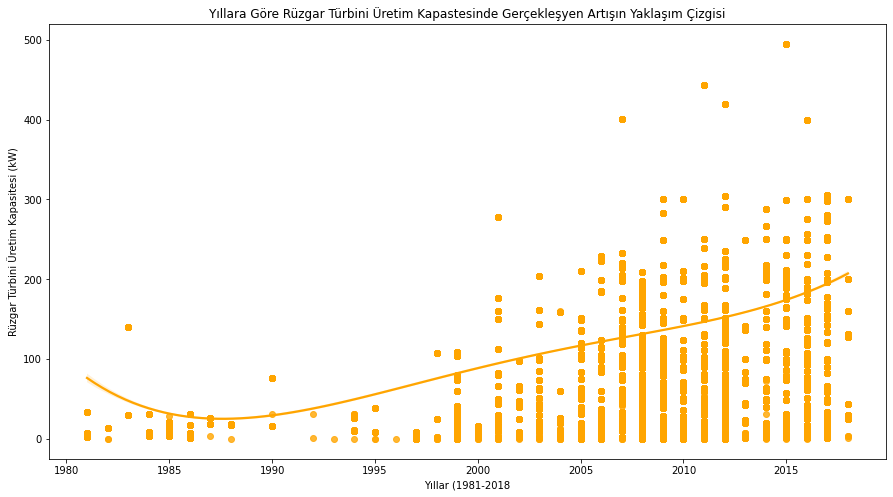

In [35]:
plt.figure(figsize=(15,8))
ax = sns.regplot(x="p_year",
                 y="p_cap", 
                 data=temp,
                 color="orange",
                 order=4)
plt.xlabel("Yıllar (1981-2018")
plt.ylabel("Rüzgar Türbini Üretim Kapasitesi (kW)")
plt.title("Yıllara Göre Rüzgar Türbini Üretim Kapastesinde Gerçekleşyen Artışın Yaklaşım Çizgisi")
plt.show()

**2.2. Üretim kapasitesindeki Artışı Sağlayan Parametreler Nelerdir?**


In [36]:
power_df = df[["case_id", "p_year", "t_cap", "t_hh", "t_rd", "t_rsa", "t_ttlh"]]
power_df = power_df[power_df["t_hh"]!=-9999]
power_df = power_df[power_df["t_rd"]!=-9999]
power_df = power_df[power_df["t_rsa"]!=-9999]
power_df = power_df[power_df["t_ttlh"]!=-9999]
power_df = power_df[power_df["t_hh"]!=-9999]
power_df = power_df[power_df["p_year"]!=-9999]
power_df = power_df[power_df["t_cap"]!=-9999]
power_df.head()

case_id  p_year  t_cap  t_hh   t_rd     t_rsa  t_ttlh
190  3063269    2017   3000  87.5  125.0  12271.85   150.0
191  3057059    2017   3000  87.5  125.0  12271.85   150.0
192  3060912    2017   3000  87.5  125.0  12271.85   150.0
193  3063272    2017   3000  87.5  125.0  12271.85   150.0
194  3049502    2017   3000  87.5  125.0  12271.85   150.0

In [37]:
fig = px.scatter(power_df, 
                 x="t_ttlh",
                 y="t_cap",
                 labels = {"t_ttlh":"Toplam Rüzgar Türbini Yüksekliği (mt)", "t_cap":"Üretim Kapasitesi (kW)"},
                 title="Rüzgar Türbini Özelliklerinin Enerji Üretim Kapasitesiyle İlişkisi")

fig.add_trace(go.Scatter(x=power_df["t_rd"],
                         y=power_df["t_cap"],
                         name="Rotor Yarıçapı (mt)",
                         mode="markers")
              )

fig.add_trace(go.Scatter(x=power_df["t_hh"],
                         y=power_df["t_cap"],
                         name="Rüzgar Türbini Gökbek Yüksekliği (mt)",
                         mode="markers"))

fig.add_trace(go.Scatter(x=np.sqrt(power_df["t_rsa"]),
                         y=power_df["t_cap"], 
                         name="Rüzgar Türbini Rotor Süpürme Alanı (mt)",
                         mode="markers"))

fig.show()

**2-Soruya Ait Gözlemler:** 


*   2000 öncesi rüzgar türbinlerinin ortalama üretim kapasitesi **259 kW** bandındayken, 2000 sonrası kurulumu yapılan rüzgar türbinlerinin ortalama üretim kapasitesi **1811 kW**'lara kadar artış göstermiştir, bu da yaklaşık olarak **%600 değerinde bir artışa** işaret etmektedir. Buna göre, rüzgar türbinlerinden üretilen enerji miktarında gelişen teknolojiyle birlikte ciddi artışlar gözlemlenmiştir.

*   Gözlemlenen ikinci unsur ise, verisetinde rüzgar türbinlerine ait **4 (dört)** özel nitelik verilmiştir. Verilmiş olan bu parametrelere göre, her bir parametre için değer artışı aynı zamanda üretim kapasitesindeki artışa da işaret etmekte olduğu anlaşılmıştır.

>**t_rd: Rotor Yarı Çapı**  (*Pozitif Korelasyon*)

>**t_hh: Rüzgar Türbini Göbek Yüksekliği** (*Pozitif Korelasyon*)

>**t_rsa: Rotor Türbini Sürpme Alanı** (*Pozitif Korelasyon*)

>**t_ttlh: Rüzgar Türbini Toplam Yüksekliği** (*Pozitif Korelasyon*)




**3. Yıllara Göre rüzgar türbini kurulumuna olan talep nasıl değişiklik göstermiştir?**



> Bu soruyu gözlemleyebilmek adına, öncelikle kurulum yılındaki kayıp verileri değerlendirdim. Kurulum yılına ait kayıp veri yalnızca 62 veri satırında olmasından ve ihmal edebileceğim seviyede olduğundan, gürültü olarak değerlendirdim ve verisetinden çıkarttım.

> Devamında iki farklı şekilde zamana serisine bağlı mekansal görselleştirme sağladım. 

>İlk görselleştirmede, yıllara göre değişimi **"widget"** eklentisi üzerinden yıl seçeneği işaretlenerek yapılmaktadır. 

>İkinci görselleştirmedeki yıl değişimi ise, interaktif animasyon imkanı sağlayan, animation_frame fonksiyonuyla sayesinde yapılmaktadır.



In [38]:
df = df[df['p_year']!= -9999]
years_lst = df['p_year'].astype('int').unique().tolist()

In [39]:
years_lst.sort()
print(years_lst)

[1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1990, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [40]:
years = df['p_year'].astype('int').unique()
years.sort()
@interact(Years = years)
def f(Years):      
    df2 = df[df['p_year']==Years]
    fig = px.density_mapbox(df2, 
                            lat='ylat', 
                            lon='xlong', 
                            radius=10,
                            center=dict(lat=44.9672, lon=-103.771556), 
                            zoom=1.5,
                            mapbox_style="stamen-terrain",
                            title= Years.astype('str') + " - Senesine Ait Rüzgar Türbini Kurulumları",
                            range_color=(0,15),
                            width=1200,
                            height=500)
    fig.layout.coloraxis.colorbar.title = 'Rüzgar Türbini Adeti'
    return fig.show()

interactive(children=(Dropdown(description='Years', options=(1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1…

In [41]:
distribution = df
distribution = distribution.sort_values(by="p_year", ascending=True)
distribution = distribution[distribution['t_manu']!= "missing"]

In [42]:
fig = px.density_mapbox(distribution, lat="ylat",
                        lon="xlong", 
                        zoom=2.5,
                        radius=15,
                        range_color=(0,15),
                        hover_name="t_manu",
                        mapbox_style="stamen-terrain",
                        animation_frame="p_year",
                        title="Yıllara Göre Rüzgar Türbini Kurulumları")
fig.layout.coloraxis.colorbar.title = 'Rüzgar Türbini Adeti'
fig.show()

**3. Soruya Ait Gözlemler:**

Yıllara göre devreye alınan rüzgar türbinlerinde farklı zaman periyotları için farklı eyaletler talep görmüştür. 

Yapmış olduğum gözlemleri doğrulayabilmek adına farklı kaynaklardan da araştırmalar yaptım [Kaynak-1](https://www.americanprogress.org/article/good-government-investments-in-renewable-energy/), [Kaynak-2](https://www.everycrsreport.com/reports/R42576.html). Buna göre özellikle 2013 yılındaki rüzgar türbini devreye alımlarındaki ciddi düşüşün temel sebebinin, **PTC (Üretim Vergisi Kredisi)** olduğunu anladım.


**PTC Nedir?**

Üretim Vergi Kredisi (Production Tax Credit (PTC)), şebeke ölçeğinde rüzgar santrallerinde üretilen enerji miktarınca vergi teşviği sağlamaktadır.

**Peki Neden 2013'te Tesis Kurulumlarında Ciddi Düşüş Yaşandı?**

2013 yılı itibariyle, devletin rüzgar enerjisi için sağlamış olduğu vergi teşviği paketinin (PTC), süresi dolmaktadır.

**Yıllara Göre Devreye Alımlardaki Olaylar**


*   **1981-1998**

Bu zaman aralığında sadece **Kaliforniya (CA)** eyaletinde türbin devreye alımlar gözlemlenmiştir.

*   **1999-2005**

1999 yılı itibariyle, Kaliforniya eyaletine ek olarak, **Iowa (IA)** ve **Teksas (TX)** eyaletlerinin yoğunlukta olduğu şekilde rüzgan türbini devreye alımlar gözlemlenmiştir.

*   **2005-2012**

2005 yılı itibariyle, rüzgar türbini yatırımlarında özellikle "**Teksas (TX), Iowa (IA), Oklahoma (OK), Kansas (KS), Illinois (IL), Minnesota (MN)**" eyaletlerinde rüzgar türbini devreye alımları gözlemlenmiştir.

*   **2013**

2013 yılında, devletin sağlamış olduğu vergi teşviğinin **(PTC)**, süresinin dolması sebebiyle rüzgar türbini devreye alımlarında ciddi düşüş gözlemlenmiştir.

*   **2014-2018**

Yenilenen vergi teşvikleriyle birlikte, **Teksas (TX)** ve **Oklahoma (OK)** eyaletleri öncelikli olmak üzere devreye alımlar tekrar hız kazanmıştır. 